# Heart Failure Clustering

## Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/heart_failure_clinical_records_dataset.csv')

In [3]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

## Prepare Data

In [6]:
def min_max_scaling(df):
	for column in df.columns:
		min_col = df[column].min()
		max_col = df[column].max()
		df[column] = (df[column] - min_col) / (max_col - min_col)
	return df

In [7]:
data_scaled = min_max_scaling(data.drop(['DEATH_EVENT'], axis=1))
data_scaled.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0,0.000000
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0,0.007117
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0,0.010676
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0,0.010676
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0,0.014235


## Clustering Algorithms

In [8]:
from sklearn.metrics import silhouette_score

### K-Means

In [9]:
from sklearn.cluster import KMeans

In [10]:
def apply_kmeans(data, n_clusters=3):
	kmeans = KMeans(n_clusters=n_clusters, random_state=0)
	clusters = kmeans.fit_predict(data)
	return clusters

In [11]:
# Apply K-Means
kmeans_clusters = apply_kmeans(data_scaled)

In [12]:
score_kmeans = silhouette_score(data_scaled, kmeans_clusters)
print("Silhouette Score for K-Means:", score_kmeans)

Silhouette Score for K-Means: 0.1662053704384958


### Hierarchical Clustering

In [13]:
from sklearn.cluster import AgglomerativeClustering

In [14]:
def apply_hierarchical(data, n_clusters=3):
	clustering = AgglomerativeClustering(n_clusters=n_clusters)
	clusters = clustering.fit_predict(data)
	return clusters

In [15]:
hierarchical_clusters = apply_hierarchical(data_scaled)

In [16]:
score_hierarchical = silhouette_score(data_scaled, hierarchical_clusters)
print("Silhouette Score for Hierarchical Clustering:", score_hierarchical)

Silhouette Score for Hierarchical Clustering: 0.17219835825636826


### DBSCAN

In [17]:
from sklearn.cluster import DBSCAN

In [18]:
def apply_dbscan(data, eps=0.5, min_samples=5):
	dbscan = DBSCAN(eps=eps, min_samples=min_samples)
	clusters = dbscan.fit_predict(data)
	return clusters

In [19]:
dbscan_clusters = apply_dbscan(data_scaled)

In [20]:
score_dbscan = silhouette_score(data_scaled, dbscan_clusters)
print("Silhouette Score for DBSCAN:", score_dbscan)

Silhouette Score for DBSCAN: 0.3916184770146636


### Mean Shift

In [21]:
from sklearn.cluster import MeanShift

In [22]:
def apply_mean_shift(data, bandwidth=None):
	mean_shift = MeanShift(bandwidth=bandwidth)
	clusters = mean_shift.fit_predict(data)
	return clusters

In [23]:
mean_shift_clusters = apply_mean_shift(data_scaled)

### Spectral Clustering

In [24]:
from sklearn.cluster import SpectralClustering

In [25]:
def apply_spectral(data, n_clusters=3):
	spectral = SpectralClustering(n_clusters=n_clusters, random_state=0)
	clusters = spectral.fit_predict(data)
	return clusters

In [26]:
spectral_clusters = apply_spectral(data_scaled)

In [27]:
score_spectral = silhouette_score(data_scaled, spectral_clusters)
print("Silhouette Score for Spectral Clustering:", score_spectral)

Silhouette Score for Spectral Clustering: 0.1838096107043599


### Agglomerative Clustering

In [28]:
def apply_agglomerative(data, n_clusters=3):
	agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
	clusters = agglomerative.fit_predict(data)
	return clusters

In [29]:
agglomerative_clusters = apply_agglomerative(data_scaled)

In [30]:
score_agglomerative = silhouette_score(data_scaled, agglomerative_clusters)
print("Silhouette Score for Agglomerative Clustering:", score_agglomerative)

Silhouette Score for Agglomerative Clustering: 0.17219835825636826


## Evaluate Silhouette Scores

In [31]:
def evaluate_clustering_algorithms(data, cluster_labels):
	scores = {}
	for algorithm, labels in cluster_labels.items():
		if len(set(labels)) > 1:
			score = silhouette_score(data, labels)
			scores[algorithm] = score
		else:
			scores[algorithm] = None
	return pd.DataFrame(list(scores.items()), columns=['Algorithm', 'Silhouette Score'])

In [32]:
cluster_labels = {
	'K-Means': kmeans_clusters,
	'Hierarchical': hierarchical_clusters,
	'DBSCAN': dbscan_clusters,
	'Mean Shift': mean_shift_clusters,
	'Spectral': spectral_clusters,
	'Agglomerative': agglomerative_clusters
}

In [33]:
evaluation_results = evaluate_clustering_algorithms(data_scaled, cluster_labels)
evaluation_results

,Algorithm,Silhouette Score
0,K-Means,0.166205
1,Hierarchical,0.172198
2,DBSCAN,0.391618
3,Mean Shift,NaN
4,Spectral,0.183810
5,Agglomerative,0.172198


## Etudier le nombre de clusters idémal

### K-Means (Elbow Method)

In [34]:
from sklearn.cluster import KMeans

In [35]:
def find_optimal_clusters_kmeans(data, max_k):
	sse = []
	for k in range(1, max_k+1):
		kmeans = KMeans(n_clusters=k, random_state=42)
		kmeans.fit(data)
		sse.append(kmeans.inertia_)
	plt.figure(figsize=(10, 6))
	plt.plot(range(1, max_k+1), sse, marker='o')
	plt.xlabel('Number of clusters')
	plt.ylabel('SSE')
	plt.title('The Elbow Method to Determine Optimal Number of Clusters')
	plt.show()

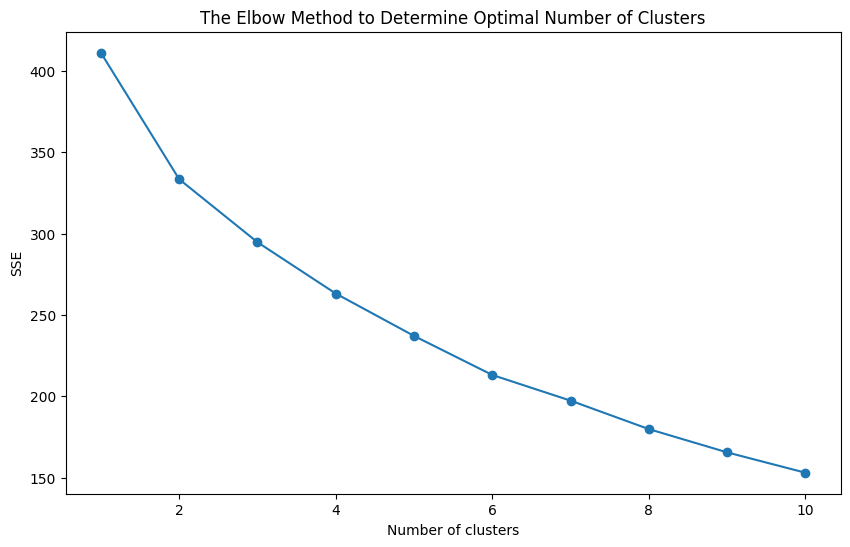

In [36]:
find_optimal_clusters_kmeans(data_scaled, 10)

In [37]:
kmeans_optimal = KMeans(n_clusters=7, random_state=42)
kmeans_labels_optimal = kmeans_optimal.fit_predict(data_scaled)
score_kmeans_optimal = silhouette_score(data_scaled, kmeans_labels_optimal)
print("Silhouette Score for K-Means:", score_kmeans_optimal)

Silhouette Score for K-Means: 0.23246792472780192


### Silhouette Score

In [38]:
def silhouette_analysis(data, max_k):
	silhouette_scores = []
	for k in range(2, max_k+1):
		kmeans = KMeans(n_clusters=k, random_state=42)
		labels = kmeans.fit_predict(data)
		score = silhouette_score(data, labels)
		silhouette_scores.append(score)
	plt.figure(figsize=(10, 6))
	plt.plot(range(2, max_k+1), silhouette_scores, marker='o')
	plt.xlabel('Number of clusters')
	plt.ylabel('Silhouette Score')
	plt.title('Silhouette Analysis For Optimal Number of Clusters')
	plt.show()

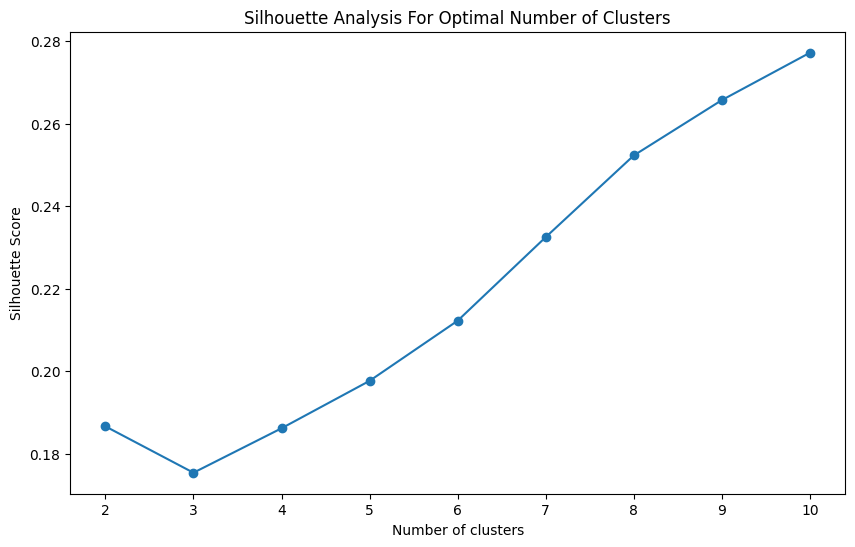

In [39]:
silhouette_analysis(data_scaled, 10)

### Hierarchical Clustering (Dendrogram)

In [40]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [41]:
def plot_dendrogram(data, method='ward'):
	linked = linkage(data, method=method)
	plt.figure(figsize=(10, 7))
	dendrogram(linked, truncate_mode='lastp', p=12, leaf_rotation=90., leaf_font_size=12.)
	plt.title('Dendrogram for Hierarchical Clustering')
	plt.xlabel('Cluster Size')
	plt.ylabel('Distance')
	plt.show()

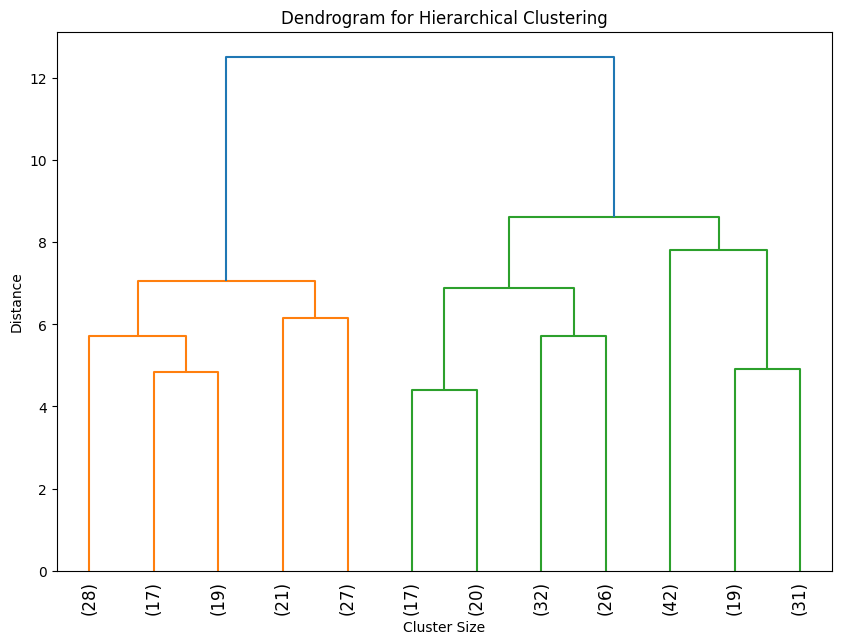

In [42]:
plot_dendrogram(data_scaled)

In [43]:
hierarchical_optimal = AgglomerativeClustering(n_clusters=7)
hierarchical_labels_optimal = hierarchical_optimal.fit_predict(data_scaled)
score_hierarchical_optimal = silhouette_score(data_scaled, hierarchical_labels_optimal)
print("Silhouette Score for Hierarchical Clustering:", score_hierarchical_optimal)

Silhouette Score for Hierarchical Clustering: 0.2129828379873054


### Mean Shift

In [44]:
from sklearn.cluster import estimate_bandwidth

In [45]:
def find_optimal_bandwidth(data):
	bandwidth = estimate_bandwidth(data, quantile=0.2)
	print("Estimated Bandwidth:", bandwidth)
	mean_shift = MeanShift(bandwidth=bandwidth)
	clusters = mean_shift.fit_predict(data)
	return clusters

In [46]:
mean_shift_clusters = find_optimal_bandwidth(data_scaled)

Estimated Bandwidth: 1.2934867949041473


In [47]:
mean_shift_optimal = MeanShift(bandwidth=estimate_bandwidth(data_scaled))
mean_shift_labels_optimal = mean_shift_optimal.fit_predict(data_scaled)

### DBSCAN

In [48]:
from sklearn.cluster import DBSCAN

In [49]:
def tune_dbscan(data, eps_range, min_samples_range):
	best_score = -1
	best_eps = None
	best_min_samples = None
	for eps in eps_range:
		for min_samples in min_samples_range:
			dbscan = DBSCAN(eps=eps, min_samples=min_samples)
			labels = dbscan.fit_predict(data)
			if len(set(labels)) > 1:
				score = silhouette_score(data, labels)
				if score > best_score:
					best_score = score
					best_eps = eps
					best_min_samples = min_samples
	return best_eps, best_min_samples, best_score

In [50]:
eps_range = np.arange(0.1, 1.0, 0.1)
min_samples_range = range(2, 10)
best_eps, best_min_samples, best_score = tune_dbscan(data_scaled, eps_range, min_samples_range)
print("Best eps:", best_eps, "Best min_samples:", best_min_samples, "Best Silhouette Score:", best_score)

Best eps: 0.8 Best min_samples: 2 Best Silhouette Score: 0.4638464782642073


In [51]:
dbscan_optimal = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan_labels_optimal = dbscan_optimal.fit_predict(data_scaled)
score_dbscan_optimal = silhouette_score(data_scaled, dbscan_labels_optimal)
print("Silhouette Score for DBSCAN:", score_dbscan_optimal)

Silhouette Score for DBSCAN: 0.4638464782642073


### Spectral Clustering & Agglomerative Clustering

In [52]:
def find_optimal_clusters_silhouette(data, algorithm_class, max_clusters=10):
	scores = []
	for k in range(2, max_clusters + 1):
		model = algorithm_class(n_clusters=k)
		clusters = model.fit_predict(data)
		score = silhouette_score(data, clusters)
		scores.append(score)
	plt.figure(figsize=(8, 6))
	plt.plot(range(2, max_clusters + 1), scores, marker='o')
	plt.title('Silhouette Score for Optimal Clusters')
	plt.xlabel('Number of clusters')
	plt.ylabel('Silhouette Score')
	plt.show()

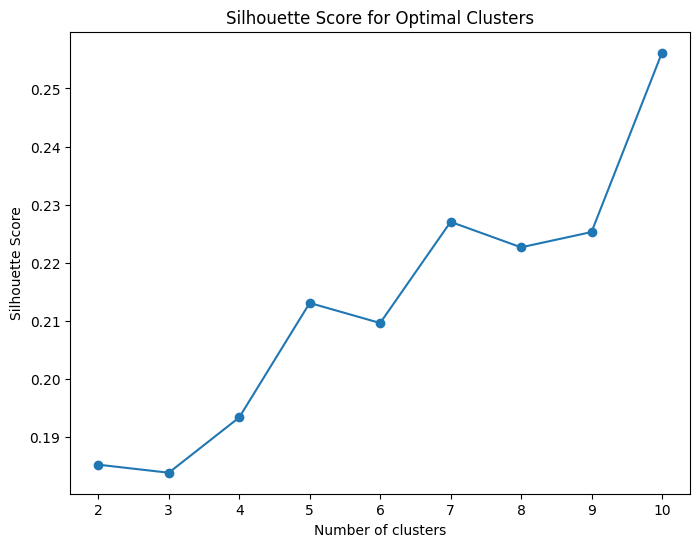

In [53]:
find_optimal_clusters_silhouette(data_scaled, SpectralClustering)

In [54]:
spectral_optimal = SpectralClustering(n_clusters=10, random_state=42)
spectral_labels_optimal = spectral_optimal.fit_predict(data_scaled)
score_spectral_optimal = silhouette_score(data_scaled, spectral_labels_optimal)
print("Silhouette Score for Spectral Clustering:", score_spectral_optimal)

Silhouette Score for Spectral Clustering: 0.22955670024967761


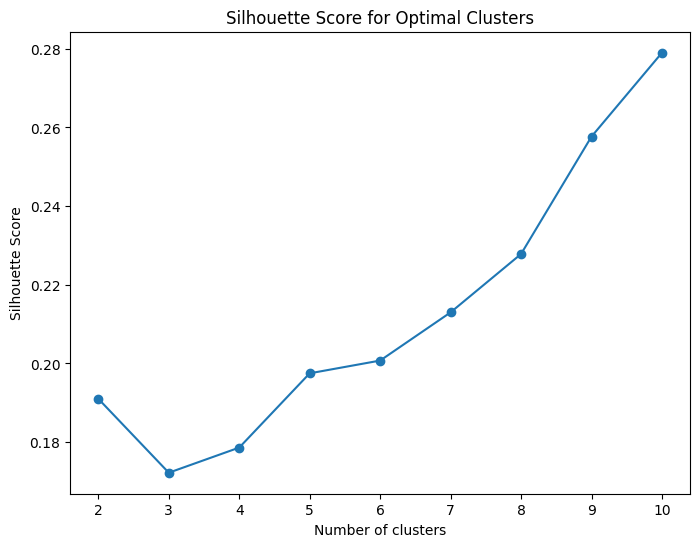

In [55]:
find_optimal_clusters_silhouette(data_scaled, AgglomerativeClustering)

In [56]:
agglomerative_optimal = AgglomerativeClustering(n_clusters=10)
agglomerative_labels_optimal = agglomerative_optimal.fit_predict(data_scaled)
score_agglomerative_optimal = silhouette_score(data_scaled, agglomerative_labels_optimal)
print("Silhouette Score for Agglomerative Clustering:", score_agglomerative_optimal)

Silhouette Score for Agglomerative Clustering: 0.2790123700243457


## La qualité de la classification des clusters idéma

In [57]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

In [58]:
def evaluate_clustering_quality(data, labels_dict):
	results = []
	for algorithm, labels in labels_dict.items():
		num_labels = len(set(labels))
		if num_labels > 1:
			silhouette = silhouette_score(data, labels)
			davies_bouldin = davies_bouldin_score(data, labels)
			calinski_harabasz = calinski_harabasz_score(data, labels)
		else:
			silhouette = None
			davies_bouldin = None
			calinski_harabasz = None
		results.append((algorithm, silhouette, davies_bouldin, calinski_harabasz))
	results_df = pd.DataFrame(results, columns=['Algorithm', 'Silhouette Score', 'Davies-Bouldin Index', 'Calinski-Harabasz Index'])
	return results_df

In [59]:
optimal_labels = {
	'K-Means': kmeans_labels_optimal,
	'Hierarchical': hierarchical_labels_optimal,
	'DBSCAN': dbscan_labels_optimal,
	'Mean Shift': mean_shift_labels_optimal,
	'Spectral': spectral_labels_optimal,
	'Agglomerative': agglomerative_labels_optimal
}

In [60]:
clustering_quality_results = evaluate_clustering_quality(data_scaled, optimal_labels)
clustering_quality_results

,Algorithm,Silhouette Score,Davies-Bouldin Index,Calinski-Harabasz Index
0,K-Means,0.232468,1.476832,52.793230
1,Hierarchical,0.212983,1.447152,52.406199
2,DBSCAN,0.463846,1.323506,61.309896
3,Mean Shift,NaN,NaN,NaN
4,Spectral,0.229557,1.312351,47.433587
5,Agglomerative,0.279012,1.315565,54.043990


## Visualisation des clusters

### PCA

In [61]:
from sklearn.decomposition import PCA

In [62]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

In [63]:
def plot_clusters(data, labels, title):
	plt.figure(figsize=(10, 6))
	unique_labels = np.unique(labels)
	for label in unique_labels:
		plt.scatter(data[labels == label, 0], data[labels == label, 1], label=f'Cluster {label}')
	plt.title(title)
	plt.xlabel('PCA Component 1')
	plt.ylabel('PCA Component 2')
	plt.legend()
	plt.show()

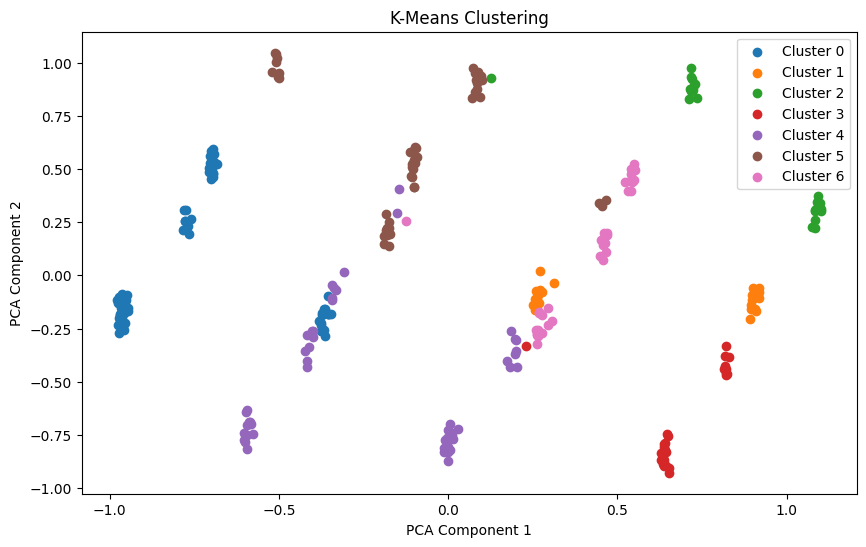

In [64]:
plot_clusters(data_pca, kmeans_labels_optimal, 'K-Means Clustering')

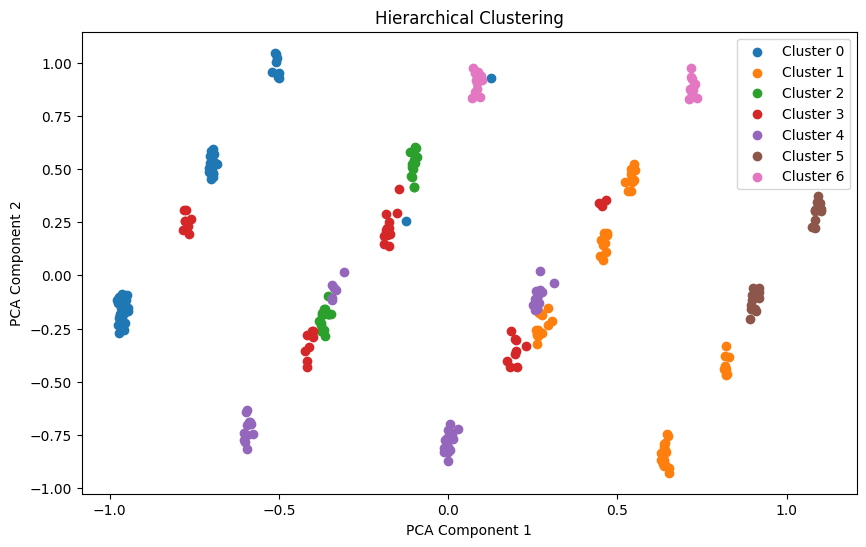

In [65]:
plot_clusters(data_pca, hierarchical_labels_optimal, 'Hierarchical Clustering')

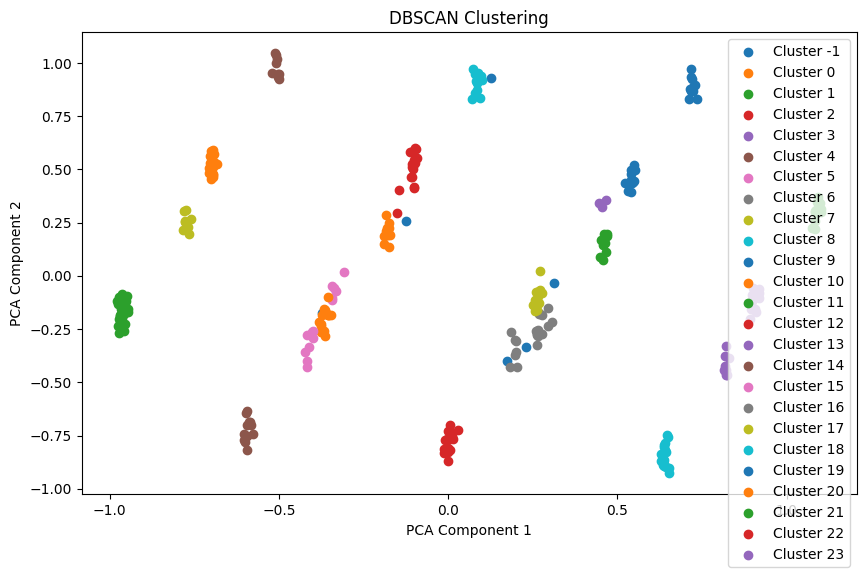

In [66]:
plot_clusters(data_pca, dbscan_labels_optimal, 'DBSCAN Clustering')

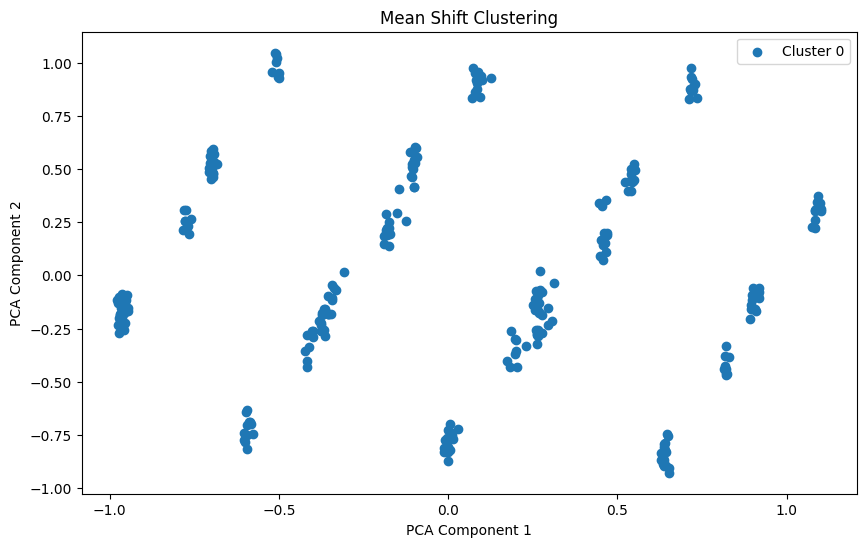

In [67]:
plot_clusters(data_pca, mean_shift_labels_optimal, 'Mean Shift Clustering')

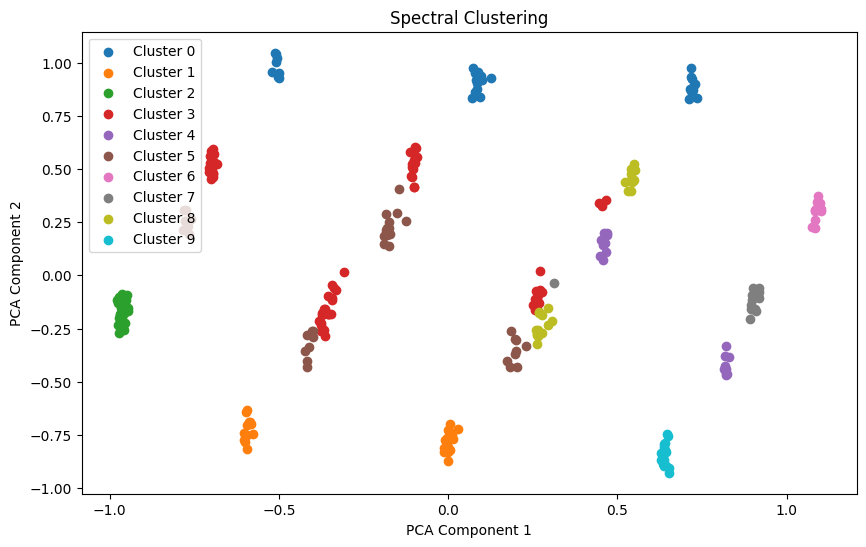

In [68]:
plot_clusters(data_pca, spectral_labels_optimal, 'Spectral Clustering')

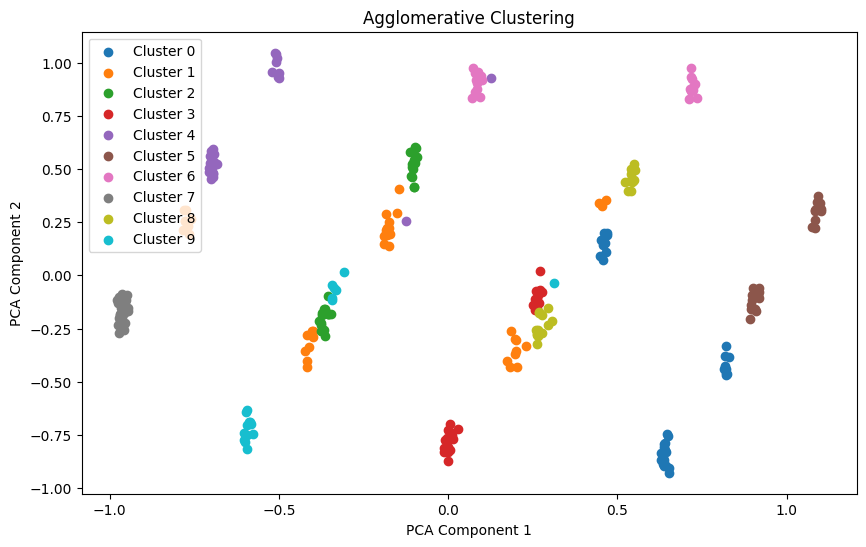

In [69]:
plot_clusters(data_pca, agglomerative_labels_optimal, 'Agglomerative Clustering')

### T-SNE

In [70]:
from sklearn.manifold import TSNE

In [71]:
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data_scaled)

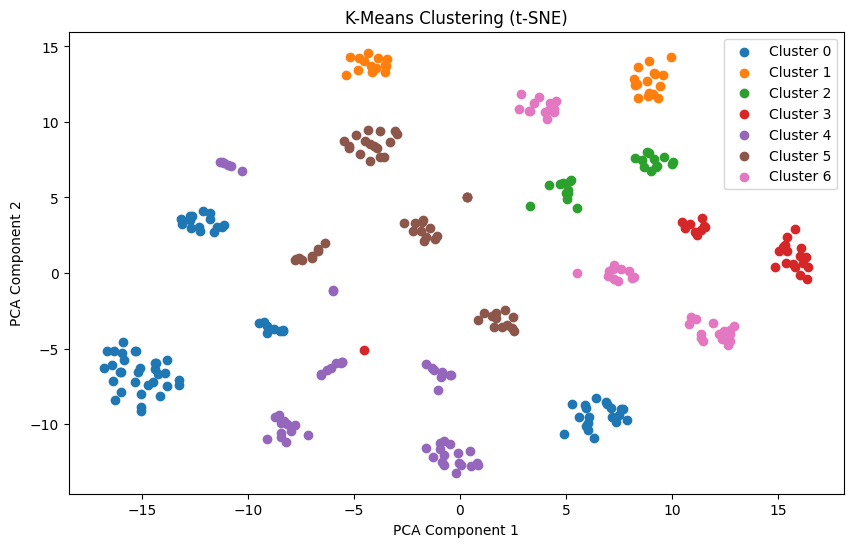

In [72]:
plot_clusters(data_tsne, kmeans_labels_optimal, 'K-Means Clustering (t-SNE)')

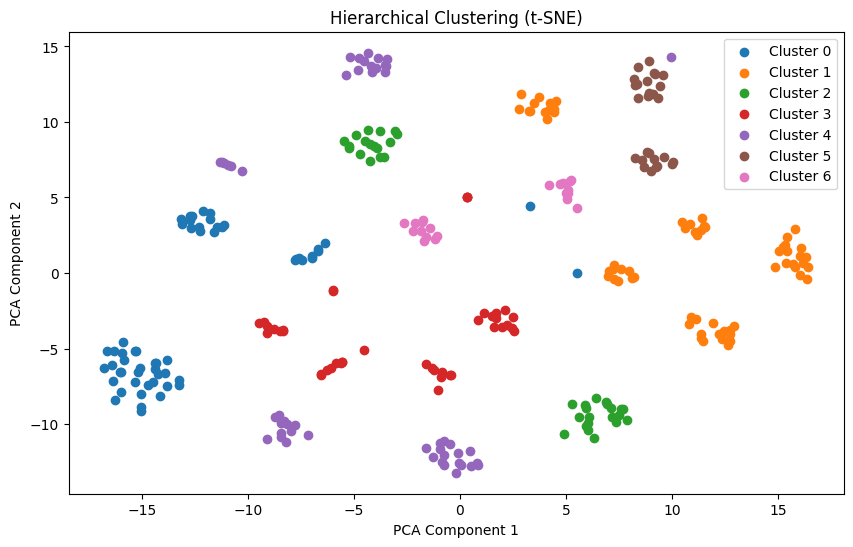

In [73]:
plot_clusters(data_tsne, hierarchical_labels_optimal, 'Hierarchical Clustering (t-SNE)')

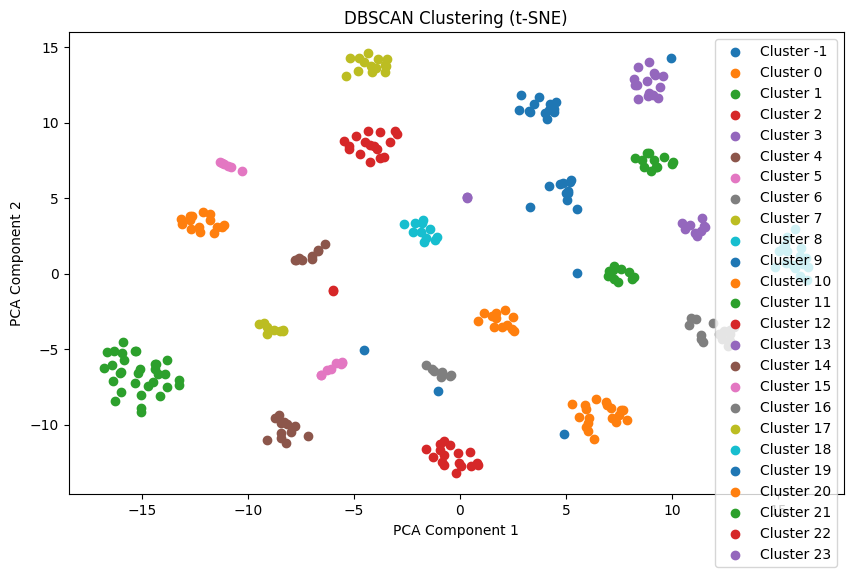

In [74]:
plot_clusters(data_tsne, dbscan_labels_optimal, 'DBSCAN Clustering (t-SNE)')

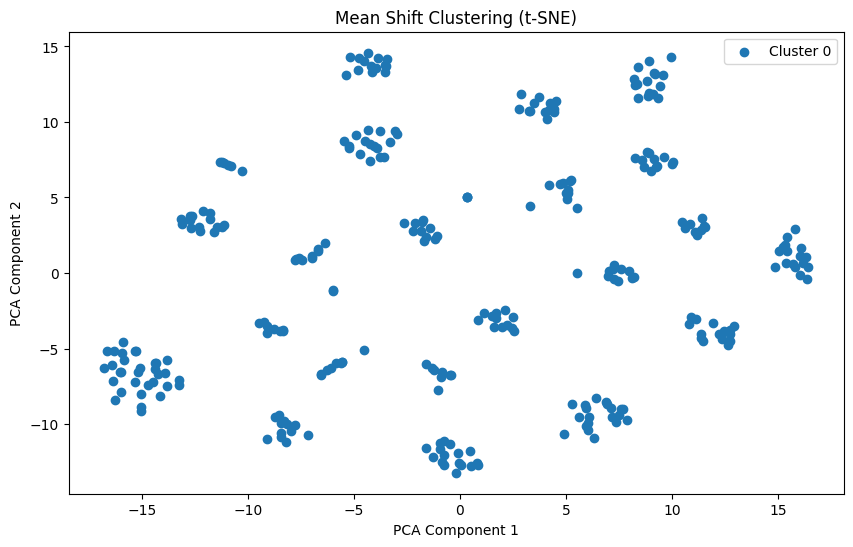

In [75]:
plot_clusters(data_tsne, mean_shift_labels_optimal, 'Mean Shift Clustering (t-SNE)')

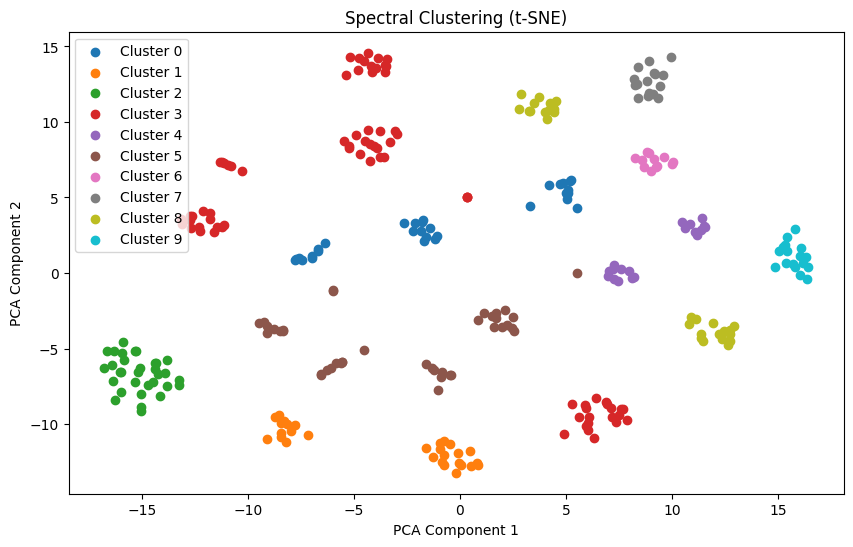

In [76]:
plot_clusters(data_tsne, spectral_labels_optimal, 'Spectral Clustering (t-SNE)')

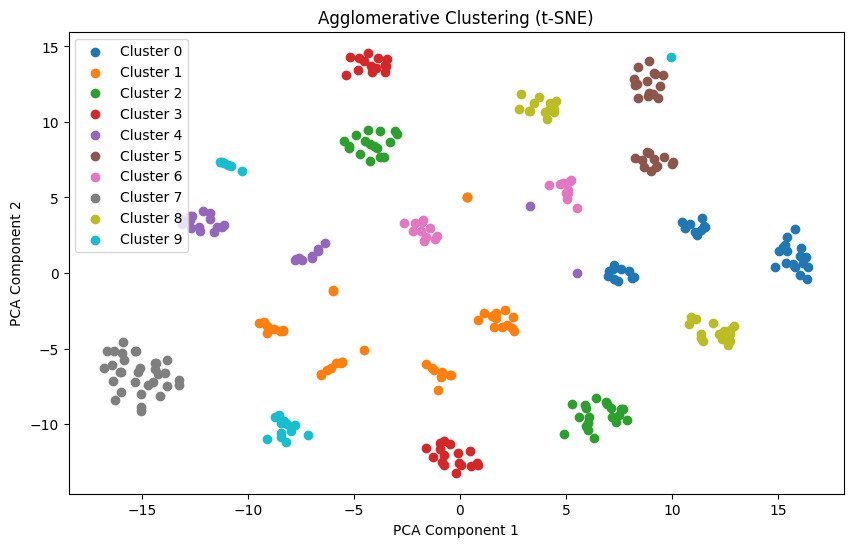

In [77]:
plot_clusters(data_tsne, agglomerative_labels_optimal, 'Agglomerative Clustering (t-SNE)')